# Sales Data Insight: In The Pursuit of Profitability

Data Set is available at https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
The file'Sample - Superstore.csv' was renamed to 'Sample.csv'

The purpose of this exercise is to determine what insight we can obtain from Sales Data from a superstore.
Questions:
1. What are the most profitable product groups?
2. What would the sales performace be without discounts?
3. What is the recomendation regarding discount policy?

In [201]:
# Import Data Set
#import numpy as np --Not Used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv (r'~\Downloads\Sample.csv')
df.shape
#df.head

(9994, 21)

Shall  add the following fields for our analysis:
Period: Determines which year sales where made
Sales2: The amount of Sales had there been no discount (we assume that lack of discount does not reduce sales)
Profit2: The amount of profit had there been no discount (we assume that lack of discount does not reduce sales)

In [202]:
#Add additional fields
df["Period"]=df['Order Date'].str[-4:]# Add Year to the Data Set as string
df["Sales2"]=df["Sales"]/(1-df["Discount"])
df["Profit2"]=df["Profit"]+df["Sales2"]-df["Sales"]


In [203]:
#Records per year
Period_vals = df.Period.value_counts()
Period_vals

2017    3312
2016    2587
2015    2102
2014    1993
Name: Period, dtype: int64

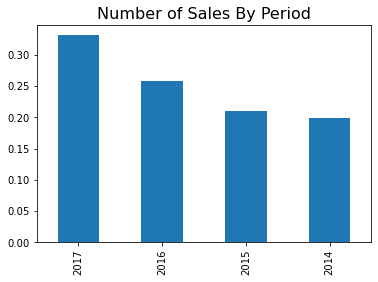

In [204]:
(Period_vals/df.shape[0]).plot(kind="bar");
plt.title("Number of Sales By Period",fontsize=16);

In [205]:
#Records by Region
df.groupby(['Region']).size()

Region
Central    2323
East       2848
South      1620
West       3203
dtype: int64

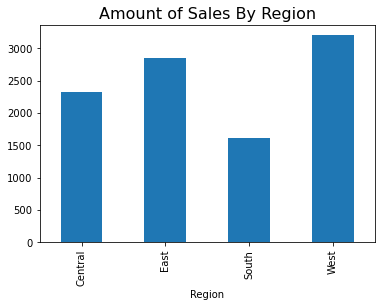

In [206]:
#Amount of Sales by region
df.groupby(['Region']).size().plot(kind = "bar");
plt.title("Amount of Sales By Region",fontsize=16);

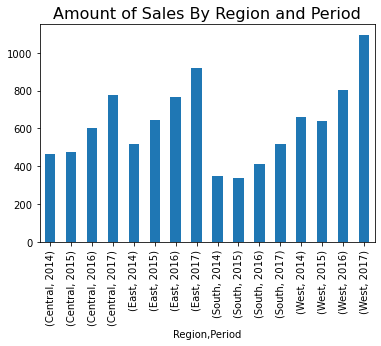

In [207]:
#Amount of Sales By Region and Period
df.groupby(['Region','Period']).size().plot(kind = "bar");
plt.title("Amount of Sales By Region and Period",fontsize=16);

It is worth noting that the South Region underperforms in comparison to the rest of the regions.

In [208]:
#Concatenate Period and Region
df["PeriodRegion"] = df["Period"].astype(str) + ' '+ df["Region"]

In [244]:
PeriodRegion_Vals=df.PeriodRegion.value_counts()

Let us see how the data looks by year and region:

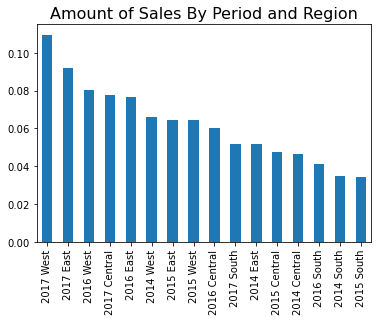

In [210]:
(PeriodRegion_Vals/df.shape[0]).plot(kind="bar");
plt.title("Amount of Sales By Period and Region",fontsize=16);

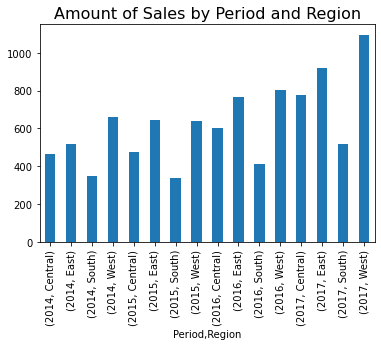

In [211]:
#Same Graph with data in chronological order

df.groupby(['Period','Region']).size().plot(kind = "bar");
plt.title("Amount of Sales by Period and Region",fontsize=16);

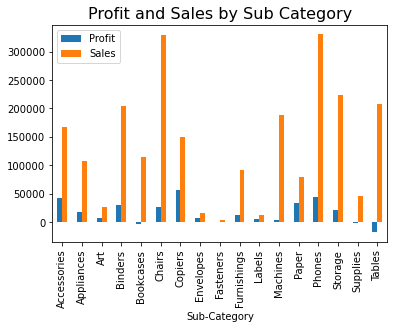

In [212]:
df.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales by Sub Category",fontsize=16         );

In [213]:
#Calculate Percentage Profit
hh=df.groupby(['Sub-Category'])[['Profit','Sales','Quantity']].apply(sum)
hh["PercentageProfit"]=(hh["Profit"]/hh["Sales"])
#hh

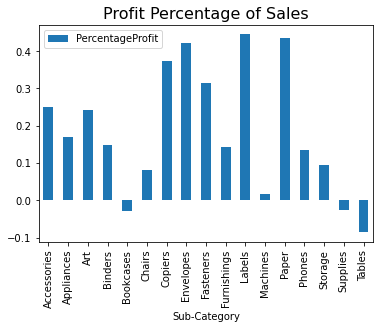

In [214]:
hh.groupby(['Sub-Category'])[['PercentageProfit']].apply(sum).plot.bar();
plt.title("Profit Percentage of Sales",fontsize=16         );

What are the most profitable product groups?

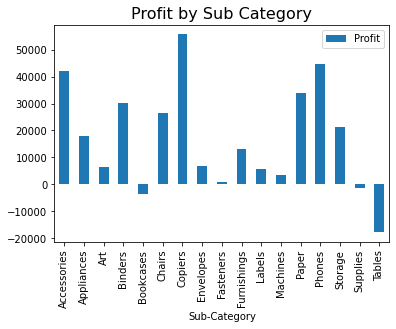

In [215]:
df.groupby(['Sub-Category'])[['Profit']].apply(sum).plot.bar();
plt.title("Profit by Sub Category",fontsize=16);

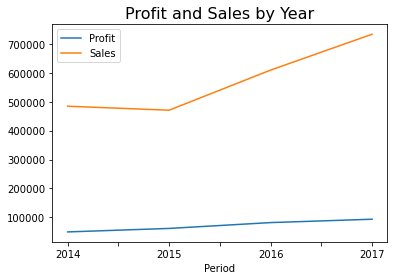

In [216]:
#Line Graph: Profit and Sales by Year
df.groupby(['Period'])[['Profit','Sales']].apply(sum).plot.line();
plt.title("Profit and Sales by Year",fontsize=16);

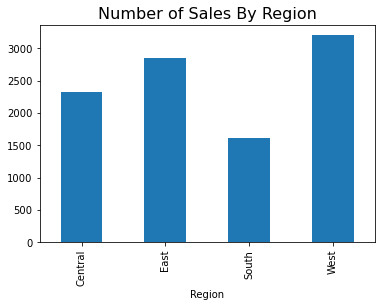

In [217]:
df.groupby(['Region']).size().plot(kind = "bar");
plt.title("Number of Sales By Region",fontsize=16);

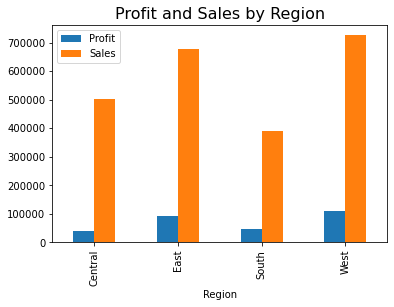

In [218]:
df.groupby(['Region'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales by Region",fontsize=16);


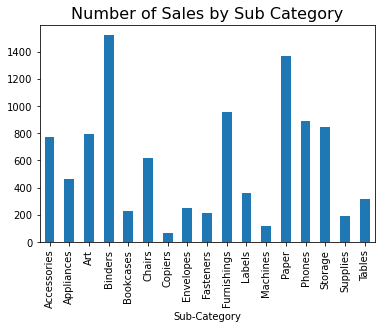

In [219]:
df.groupby(['Sub-Category']).size().plot(kind = "bar");
plt.title("Number of Sales by Sub Category",fontsize=16);

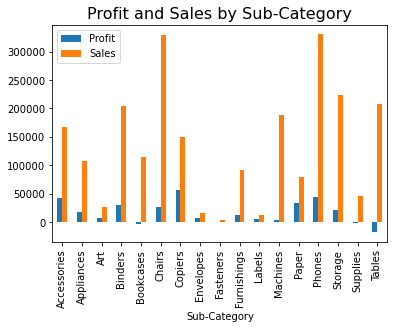

In [220]:
df.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales by Sub-Category",fontsize=16);

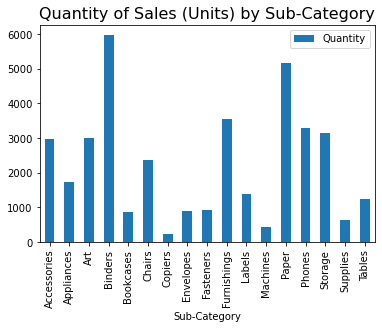

In [221]:
df.groupby(['Sub-Category'])[['Quantity']].apply(sum).plot.bar();
plt.title("Quantity of Sales (Units) by Sub-Category",fontsize=16);

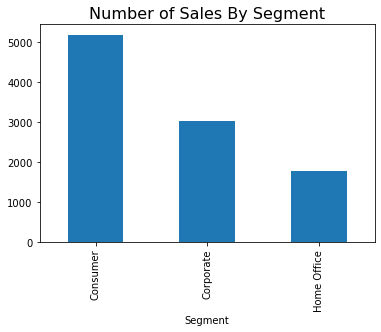

In [222]:
df.groupby(['Segment']).size().plot(kind = "bar");
plt.title("Number of Sales By Segment",fontsize=16);

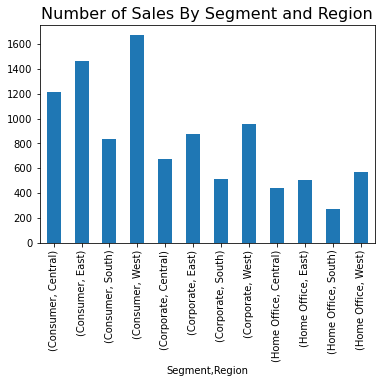

In [223]:
df.groupby(['Segment','Region']).size().plot(kind = "bar");
plt.title("Number of Sales By Segment and Region",fontsize=16);

At this point we will focus on data from 2017

In [224]:
#Let us filter only 2017
Is_2017 =  df['Period']=='2017'
#print(Is_2017.head())
#print(Is_2017)

In [225]:
Data2017=df[Is_2017]
print(Data2017.shape)

(3312, 25)


In [226]:
#This will be used later on to compare current profitability with final result
ii=Data2017.groupby(['Sub-Category'])[['Profit2','Profit']].apply(sum)
#print(ii)

In [227]:
#Calculates Profit Comparison Between no discounts and normal profit
ii["Output"]=0
cc=ii.groupby(['Output'])[['Profit2','Profit']].apply(sum)
cc["Var%"]=cc["Profit2"]/cc["Profit"]-1
print('Profit Comparison')
print(cc)

Profit Comparison
            Profit2      Profit      Var%
Output                                   
0       275687.9644  93439.2696  1.950451


In [228]:
#print(Data2017)

In [229]:
Region_vals2017 = Data2017.Region.value_counts()

Region_vals2017

West       1095
East        921
Central     778
South       518
Name: Region, dtype: int64

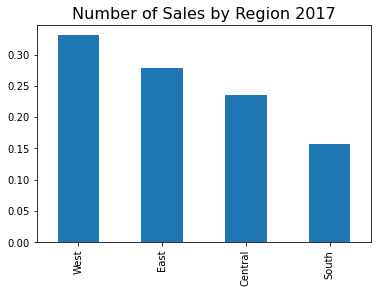

In [230]:
(Region_vals2017/Data2017.shape[0]).plot(kind="bar");
plt.title("Number of Sales by Region 2017",fontsize=16);


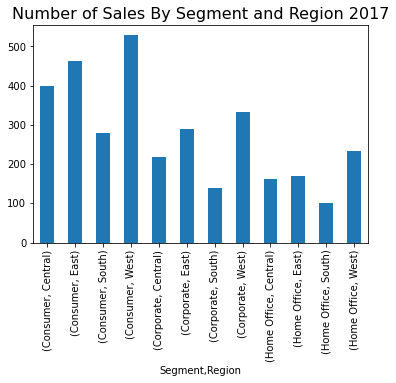

In [231]:
Data2017.groupby(['Segment','Region']).size().plot(kind = "bar");
plt.title("Number of Sales By Segment and Region 2017",fontsize=16);

A Correlation Heatmap will show the relationship between numeric fields

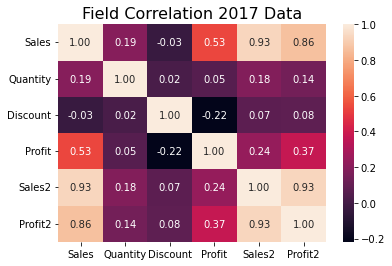

In [232]:
sns.heatmap(Data2017.drop(columns =['Row ID', 'Postal Code']).corr(), annot=True, fmt=".2f");
plt.title("Field Correlation 2017 Data",fontsize=16);

There is a moderate correlation between sales and profit.
Also there is a slight negative correlation between discount and profit.

At this point we will test to see how the data behaves by removing unprofitable sales transactions.

In [233]:
#Let us filter only the Sales with Positive Profit
Is_Profitable =  Data2017['Profit']>0
#print(Is_Profitable.head())

In [234]:
Data2017Profit=Data2017[Is_Profitable]
print(Data2017Profit.shape)

(2673, 25)


In [235]:
#This will be used later on to compare final result with series that was unmodified for profitability
iii=Data2017Profit.groupby(['Sub-Category'])[['Profit']].apply(sum)
#print(iii)

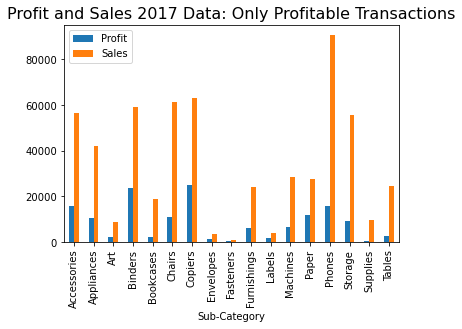

In [236]:
Data2017Profit.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales 2017 Data: Only Profitable Transactions",fontsize=16);

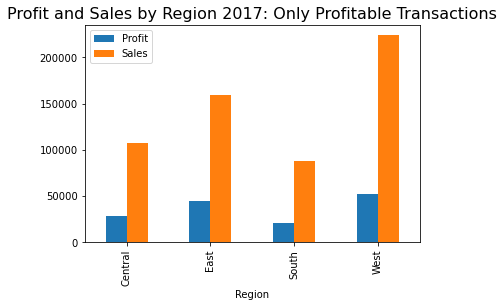

In [237]:
Data2017Profit.groupby(['Region'])[['Profit','Sales']].apply(sum).plot.bar();
plt.title("Profit and Sales by Region 2017: Only Profitable Transactions",fontsize=16);

In [238]:
hhh=Data2017Profit.groupby(['Sub-Category'])[['Profit','Sales']].apply(sum)
hhh["OriginalPercentageProfit"]=hh["Profit"]/hh["Sales"]
hhh["PercentageProfit"]=hhh["Profit"]/hhh["Sales"]
#hhh

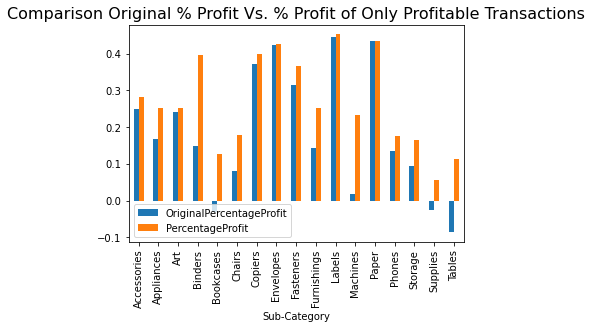

In [239]:
hhh.groupby(['Sub-Category'])[['OriginalPercentageProfit','PercentageProfit']].apply(sum).plot.bar();
plt.title("Comparison Original % Profit Vs. % Profit of Only Profitable Transactions",fontsize=16);

The heatmap after removing the unprofitable transactions:

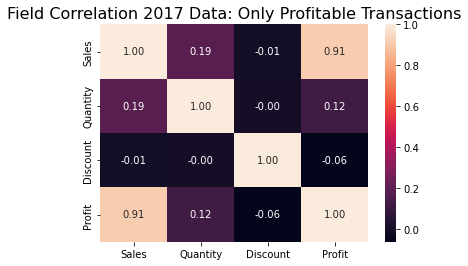

In [240]:
sns.heatmap(Data2017Profit.drop(columns =['Row ID', 'Postal Code','Sales2','Profit2']).corr(), annot=True, fmt=".2f");
plt.title("Field Correlation 2017 Data: Only Profitable Transactions",fontsize=16);

In [247]:
#Add profit in order to compare to originaL profit
iii["Original Profit"]=ii["Profit"];

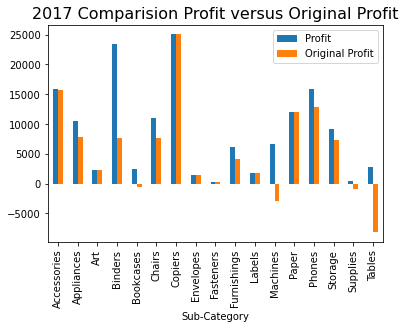

In [248]:
iii.groupby(['Sub-Category'])[['Profit','Original Profit']].apply(sum).plot.bar();
plt.title("2017 Comparision Profit versus Original Profit",fontsize=16);

In [249]:
#Calculates the impact of removing unprofitable transactions
iii["Result"]=0
iiii=iii.groupby(['Result'])[['Profit','Original Profit']].apply(sum)
iiii["Variation%"]=iiii['Profit']/iiii['Original Profit']-1
print('Profit Comparison')
print(iiii)

Profit Comparison
            Profit  Original Profit  Variation%
Result                                         
0       147275.463       93439.2696    0.576162


In conclusion removing unprofitable transactions provides a strong correlation between sales and profit, it also would increase profit by 57.6%. As a result the recomendation is to keep providing discounts as long as the specific transaction carries a profit.